# Did you perceive the Tinnitus right now?
### Crosstab by season and country


In [1]:
# project location
p_loc = 'C:/Users/joa24jm/Documents/tinnitus-country/'

# add src to path so the noteboook can import utilities.py
import sys
sys.path.append('C:\\Users\\joa24jm\\Documents\\tinnitus-country\\src\\')

In [92]:
# imports
import pandas as pd
from d00_utils import utilities as u
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# read in df
df = pd.read_csv(p_loc + '/data/02_intermediate/merged_users.csv', index_col = 'Unnamed: 0',
                parse_dates = ['4', '9', 'fup_answer_from', 'bl_answer_from'],na_values = ['??.??.????', '27.02.2522']
                )

In [4]:
# number of countries
df.country.unique().shape

(111,)

In [5]:
# improve readability
df.rename(columns = {'question1':'Tinnitus_right_now'}, inplace = True)
df.Tinnitus_right_now.replace({0.0: 'No', 1.0: 'Yes'}, inplace = True)

In [6]:
df['fup_season'] = df.fup_answer_from.dt.date.apply(u.get_season)

C:\Users\joa24jm\Documents\tinnitus-country\src\d00_utils\utilities.py:177: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.
  if start <= d <= end)


In [53]:
# get all countries with more than 30 users
u_treshold = 30

s = df.groupby('Country_Name').nunique()['user_id'] > u_treshold
u_countries = s[s].index.tolist()

# from these countries, get all with more than 300 answers
s = df[df.Country_Name.isin(u_countries)].groupby('Country_Name').size() > 300
countries = s[s].index.tolist()
countries

['Australia, Commonwealth of',
 'Austria, Republic of',
 'Belgium, Kingdom of',
 'Brazil, Federative Republic of',
 'Canada',
 'France, French Republic',
 'Germany, Federal Republic of',
 'Italy, Italian Republic',
 'Netherlands, Kingdom of the',
 'Norway, Kingdom of',
 'Spain, Kingdom of',
 'Sweden, Kingdom of',
 'Switzerland, Swiss Confederation',
 'United Kingdom of Great Britain & Northern Ireland',
 'United States of America']

## Check distribution for Norway

In [36]:
# check for norway users as they have 50% tinnitus  and 50% tinnitus NO
norway_filt = df['Country_Name'] == 'Norway, Kingdom of'

In [37]:
# how many users from Norway?
df[norway_filt].user_id.unique().shape

(42,)

In [7]:
for season in ['spring', 'summer', 'autumn', 'winter']:
    season_filt = df['fup_season'] == season
    print('Season\t\t', season)
    print('No. of users\t', df[season_filt & norway_filt].user_id.unique().shape[0])

Season		 spring
No. of users	 6
Season		 summer
No. of users	 11
Season		 autumn
No. of users	 16
Season		 winter
No. of users	 7


####  Norway has about 50% Tinnitus YES and 50 % Tinnitus NO reportings. How do the reportings vary over seasons?

In [8]:
pd.crosstab(df[df.Country_Name == 'Norway, Kingdom of'].fup_season, df.Tinnitus_right_now, normalize = 'index')


Tinnitus_right_now,No,Yes
fup_season,,
autumn,0.587361,0.412639
spring,0.417178,0.582822
summer,0.360577,0.639423
winter,0.702875,0.297125


## Check distributions for other countries in Europe

In [9]:
# sort tinnitus answers by country and season
ct = pd.crosstab([df[df.Country_Name.isin(countries)].Country_Name, df[df.Country_Name.isin(countries)].fup_season], df.Tinnitus_right_now,
                normalize='index')

In [10]:
# reindex in a logical order
ct = ct.reindex(['spring', 'summer', 'autumn', 'winter'], level = 'fup_season')

In [80]:
# find out the n_users and n_questionnaires for each country and season
ct['n_users'] = None
ct['n_questionnaires'] = None

for multi_index in ct.index:
    c = multi_index[0] # country
    s = multi_index[1] # season
    n_users = df[(df.Country_Name == c) & (df.fup_season == s)].nunique().user_id
    n_questionnaires = df[(df.Country_Name == c) & (df.fup_season == s)].shape[0]
    
    ct.loc[multi_index, 'n_users'] = n_users
    ct.loc[multi_index, 'n_questionnaires'] = n_questionnaires

# keep only countries that are above the thresholds for all seasons
ct = ct.loc[(ct.n_users > 30) & (ct.n_questionnaires > 300)]
s = ct.groupby('Country_Name').size() == 4
ct = ct.loc[s[s].index, :]
ct.to_csv(p_loc + 'results/01_tables/tinnitus_by_season.csv')
ct

Tinnitus_right_now                                                   No  \
Country_Name                                       fup_season             
Germany, Federal Republic of                       spring      0.223920   
                                                   summer      0.219304   
                                                   autumn      0.169706   
                                                   winter      0.235056   
Netherlands, Kingdom of the                        spring      0.352028   
                                                   summer      0.101167   
                                                   autumn      0.370302   
                                                   winter      0.374474   
Switzerland, Swiss Confederation                   spring      0.312107   
                                                   summer      0.250427   
                                                   autumn      0.348889   
                                                   winter      0.392694   
United Kingdom of Great Britain & Northern Ireland spring      0.156069   
                                                   summer      0.042770   
                                                   autumn      0.278978   
                                                   winter      0.341102   
United States of America                           spring      0.122672   
                                                   summer      0.188973   
                                                   autumn      0.100504   
                                                   winter      0.108846   

Tinnitus_right_now                                                  Yes  \
Country_Name                                       fup_season             
Germany, Federal Republic of                       spring      0.776080   
                                                   summer      0.780696   
                                                   autumn      0.830294   
                                                   winter      0.764944   
Netherlands, Kingdom of the                        spring      0.647972   
                                                   summer      0.898833   
                                                   autumn      0.629698   
                                                   winter      0.625526   
Switzerland, Swiss Confederation                   spring      0.687893   
                                                   summer      0.749573   
                                                   autumn      0.651111   
                                                   winter      0.607306   
United Kingdom of Great Britain & Northern Ireland spring      0.843931   
                                                   summer      0.957230   
                                                   autumn      0.721022   
                                                   winter      0.658898   
United States of America                           spring      0.877328   
                                                   summer      0.811027   
                                                   autumn      0.899496   
                                                   winter      0.891154   

Tinnitus_right_now                                            n_users  \
Country_Name                                       fup_season           
Germany, Federal Republic of                       spring         385   
                                                   summer         378   
                                                   autumn         460   
                                                   winter         387   
Netherlands, Kingdom of the                        spring          48   
                                                   summer          44   
                                                   autumn          78   
                                         

In [98]:
pd.crosstab(df.fup_season, df.Tinnitus_right_now, normalize = 'index')

Tinnitus_right_now,No,Yes
fup_season,,
autumn,0.198492,0.801508
spring,0.214979,0.785021
summer,0.197533,0.802467
winter,0.245255,0.754745


In [78]:
ct.groupby('fup_season').describe()['Yes']

,count,mean,std,min,25%,50%,75%,max
fup_season,,,,,,,,
spring,5.0,0.766641,0.098232,0.647972,0.687893,0.776080,0.843931,0.877328
summer,5.0,0.839472,0.086221,0.749573,0.780696,0.811027,0.898833,0.957230
autumn,5.0,0.746324,0.115996,0.629698,0.651111,0.721022,0.830294,0.899496
winter,5.0,0.709566,0.118457,0.607306,0.625526,0.658898,0.764944,0.891154


#### Plot Tinnitus YES NO distribution by country and season

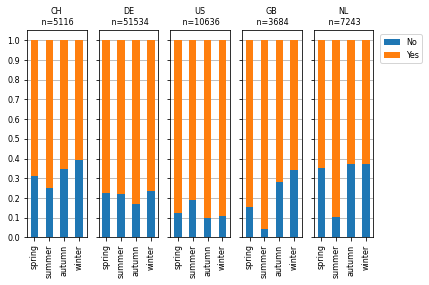

In [96]:
# generate the plot
fig, axes = plt.subplots(nrows = 1, ncols = int(ct.shape[0]/4), sharey=True)

countries = list(set([i[0] for i in ct.index]))
labels = ['spring', 'summer', 'autmn', 'winter']
country_labels = ['CH', 'DE', 'US', 'GB', 'NL']

for country2, ax, t in zip(countries, axes, country_labels):
    

    
    ct.loc[country2][['No', 'Yes']].plot.bar(stacked = True, ax = ax, zorder=3)
    
    # remove legend in each axis
    ax.get_legend().remove()
    
    # ax.set_xticklabels(labels = labels, rotation=90, fontsize=10)
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticks(np.arange(0,1.1,.1))
    
    # set log scale and labels
    country_code = df[df.Country_Name.isin([country2])].country.unique().tolist()[0]
    n = '\n n=' + str(ct.loc[country2].n_questionnaires.sum())
    title = country_code + n
    
    ax.set_title(title, fontsize=8)
    
    # grid for better readability
    ax.grid(axis='y', zorder=0)
    
    
    # show values on bars
    # u.show_values_on_bars(ax, h_v = 'v', space = 1, normalize = True)
    
   
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.savefig(p_loc + 'results/07_plots/tinnitus_by_season.svg')





### Statistics

In [73]:
ct.describe()

Tinnitus_right_now,No,Yes
count,20.000000,20.000000
mean,0.234499,0.765501
std,0.108368,0.108368
min,0.042770,0.607306
25%,0.147720,0.656952
50%,0.229488,0.770512
75%,0.343048,0.852280
max,0.392694,0.957230


## Plot distribution by continent

In [27]:
ct = pd.crosstab([df.Continent_Name, df.fup_season], df.Tinnitus_right_now, normalize = 'index')
# reindex in a logical order
ct = ct.reindex(['spring', 'summer', 'autumn', 'winter'], level = 'fup_season')

In [28]:
# Number of answers per continent and season
ns = pd.crosstab(df.Continent_Name, df.Tinnitus_right_now, normalize = False).sum(axis = 1)

In [29]:
continents = ['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America']

Text(0.5, 1.05, 'Did you perceive the tinnitus right now?')

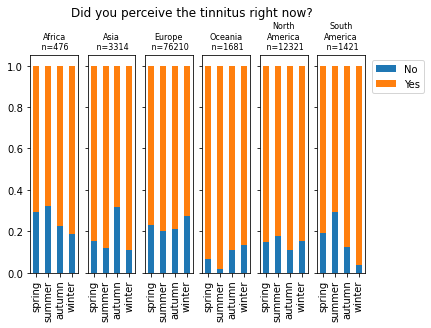

In [30]:
# generate the plot
fig, axes = plt.subplots(nrows = 1, ncols = len(continents), sharey=True)

labels = ['spring', 'summer', 'autmn', 'winter']

for continent, ax, t in zip(continents, axes, continents):
        
    ct.loc[continent][['No', 'Yes']].plot.bar(stacked = True, ax = ax)
    
    # remove legend in each axis
    ax.get_legend().remove()
    
    # ax.set_xticklabels(labels = labels, rotation=90, fontsize=10)
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    names = '\n'.join(t.split(' '))
    n = '\n n=' + str(ns[continent])
    title = names + n
    
    # set log scale and labels
    ax.set_title(title, fontsize=8)
    
    # show values on bars
    # u.show_values_on_bars(ax, h_v = 'v', space = 1, normalize = True)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.suptitle('Did you perceive the tinnitus right now?', y = 1.05)

In [38]:
pd.crosstab(df.fup_season, df.Tinnitus_right_now)

Tinnitus_right_now,No,Yes
fup_season,,
autumn,5081,20517
spring,4805,17546
summer,4532,18411
winter,6022,18532
